##################################################
CHECKING RE CPU idle and memory percent wf-woodstock
##################################################
2017-11-03 11:29:22 RE idle CPU and memory ==> 95  16
2017-11-03 11:29:25 RE idle CPU and memory ==> 96  16
2017-11-03 11:29:29 RE idle CPU and memory ==> 97  16
2017-11-03 11:29:32 RE idle CPU and memory ==> 97  16
2017-11-03 11:29:35 RE idle CPU and memory ==> 97  16
2017-11-03 11:29:38 RE idle CPU and memory ==> 97  16
2017-11-03 11:29:42 RE idle CPU and memory ==> 97  16
2017-11-03 11:29:45 RE idle CPU and memory ==> 97  16
2017-11-03 11:29:48 RE idle CPU and memory ==> 97  16
2017-11-03 11:29:51 RE idle CPU and memory ==> 97  16
                  Time  CPU-idle  re_memory
0  2017-11-03 11:29:22        95         16
1  2017-11-03 11:29:25        96         16
2  2017-11-03 11:29:29        97         16
3  2017-11-03 11:29:32        97         16
4  2017-11-03 11:29:35        97         16
5  2017-11-03 11:29:38        97         

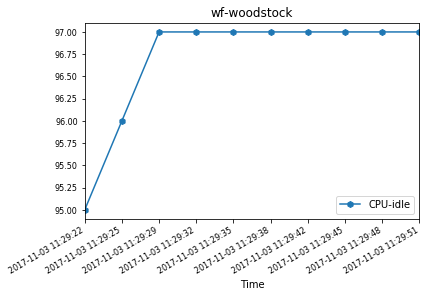

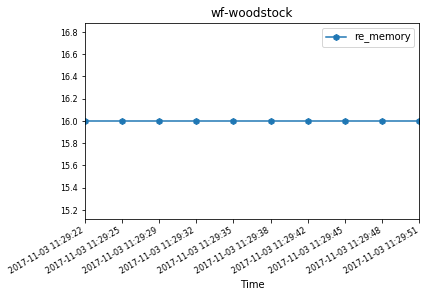

In [1]:
###START##OF#SCRIPT################
##Memory and CPU of the RE and FPC#
###Michal#Styszynski###############
#!/usr/bin/env python
import os
import pandas as pd
import logging
from jnpr.junos import Device
import datetime
import time
from time import sleep
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

now = datetime.datetime.now()

mydev = Device(user='root', host='10.13.111.120', password='Embe1mpls', port='830')

mydev.open()
if not os.path.exists('./tmp'):
    os.mkdir('tmp')


### check the RE CPU and memory 

print "#" * 50
print "CHECKING RE CPU idle and memory percent" + " " + mydev.facts['hostname']
print "#" * 50
now = datetime.datetime.now()
dt = str(time.strftime("%Y-%m-%d_%H_%M"))
fileName1003 = "./tmp/RE_idle_CPU_%s.csv"%dt
f1003 = open(fileName1003, 'w')
count = 0 
while count < 10:
    time.sleep(3)
    count = count + 1
    result303 = mydev.rpc.get_route_engine_information()
    for test444 in result303.xpath('//route-engine'):
        dt = str(time.strftime("%Y-%m-%d %H:%M:%S"))
        mastership = test444.find("mastership-state").text
        if mastership == 'master':
            re_cpu = test444.xpath("cpu-idle")[0].text
            re_memory = test444.xpath('//memory-buffer-utilization')[0].text
            print "%s RE idle CPU and memory ==> %s  %s" %(dt,re_cpu,re_memory)
            data1003 = {'Time': [dt], 'CPU-idle':[re_cpu],'re_memory':[re_memory]} 
            mydf1003 = pd.DataFrame(data=data1003)
            mydf1003.to_csv(fileName1003, mode='a', header=False, index=False, columns=['Time','CPU-idle','re_memory'])
mydf1004 = pd.read_csv(fileName1003, header=None, names=['Time','CPU-idle','re_memory'])
print mydf1004

## add some conditions for the RE CPU and memory 
mean1 = mydf1004['CPU-idle'].mean()
mean2 = mydf1004['re_memory'].mean()
if int(mean1) in range(10,40):
    print "==>KO RE CPU orange %s" % mean1
elif int(mean1) in range(0,10):
    print "==>KO RE CPU red %s " % mean1
else: 
    print "=>OK the mean value %s of idle RE CPU is green" % mean1

if int(mean2) in range(45,99):
    print "==>KO RE memory avg utilisation %s red" % mean2
elif int(mean2) in range(30,44):
    print "==>KO RE memory avg utilisation %s orange" % mean2
else: 
    print "=>OK the mean value %s of the RE memory total utilization is green" % mean2
f1003.close()


### plot the RE CPU and memory 

mydf1004.plot(x='Time', y='CPU-idle', kind='line',title=mydev.facts['hostname'],style='-h',fontsize=8)
plt.gcf().autofmt_xdate()

mydf1004.plot(x='Time', y='re_memory', kind='line',title=mydev.facts['hostname'],style='-h',fontsize=8)
plt.gcf().autofmt_xdate()


##################################################
CHECKING FPC CPU and memory vmx1_re
##################################################
2016-12-15 10:32:54 FPC 0 CPU ==> 26 FPC memory 21
2016-12-15 10:32:57 FPC 0 CPU ==> 20 FPC memory 21
2016-12-15 10:33:00 FPC 0 CPU ==> 15 FPC memory 21
2016-12-15 10:33:04 FPC 0 CPU ==> 17 FPC memory 21
2016-12-15 10:33:07 FPC 0 CPU ==> 14 FPC memory 21
2016-12-15 10:33:11 FPC 0 CPU ==> 20 FPC memory 21
2016-12-15 10:33:14 FPC 0 CPU ==> 20 FPC memory 21
2016-12-15 10:33:17 FPC 0 CPU ==> 20 FPC memory 21
2016-12-15 10:33:21 FPC 0 CPU ==> 19 FPC memory 21
2016-12-15 10:33:24 FPC 0 CPU ==> 21 FPC memory 21
                  Time  fpc_CPU  fpc_memory  fpc_slot
0  2016-12-15 10:32:54       26          21         0
1  2016-12-15 10:32:57       20          21         0
2  2016-12-15 10:33:00       15          21         0
3  2016-12-15 10:33:04       17          21         0
4  2016-12-15 10:33:07       14          21         0
5  2016-12-15 10:33:11      

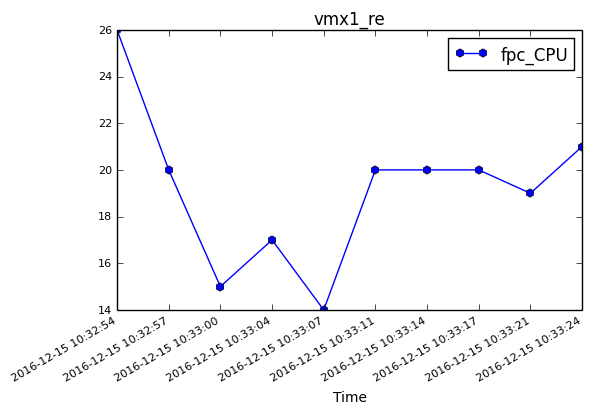

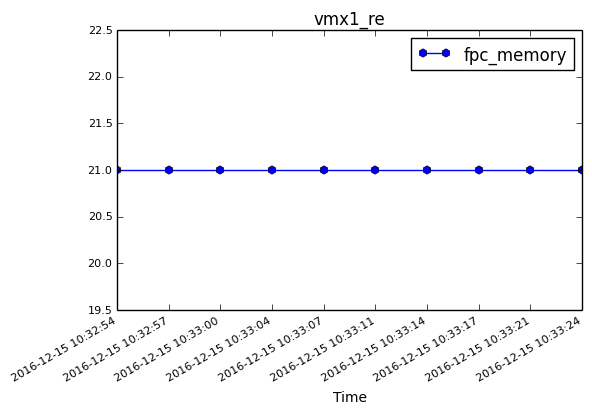

In [3]:
### check the FPC CPU and memory 

print "#" * 50
print "CHECKING FPC CPU and memory" + " " + mydev.facts['hostname']
print "#" * 50
dt = str(time.strftime("%Y-%m-%d_%H-%M"))
result2 = mydev.rpc.get_fpc_information()
for test3 in result2.xpath('//fpc'):
    fpc_slot = test3.find("slot").text
    fpc_state = test3.find("state").text
    if fpc_state == "Online":
        rpc_get_fpc = """
        <get-fpc-information>
            <fpc-slot>%s</fpc-slot>
        </get-fpc-information>""" % fpc_slot   
        dt = str(time.strftime("%Y-%m-%d_%H-%M"))
        fileName1001 = "./tmp/node_FPC-%s_CPU__%s.csv"%(fpc_slot,dt)
        f1001 = open(fileName1001, 'w')
        count = 0 
        while count < 10:
            time.sleep(3)
            count = count + 1
            result3 = mydev.rpc(rpc_get_fpc)
            for test44 in result3.xpath('//fpc'):
                dt = str(time.strftime("%Y-%m-%d %H:%M:%S"))
                fpc_cpu = test44.find("cpu-total").text
                fpc_memory = test44.find("memory-heap-utilization").text
                print "%s FPC %s CPU ==> %s FPC memory %s" % (dt,fpc_slot,fpc_cpu,fpc_memory)
                data1001 = {'Time': [dt], 'fpc_slot': [fpc_slot], 'fpc_CPU':[fpc_cpu], 'fpc_memory':[fpc_memory]} 
                mydf1001 = pd.DataFrame(data=data1001)
                mydf1001.to_csv(fileName1001, mode='a', header=False, index=False, columns=['Time','fpc_CPU','fpc_memory','fpc_slot'])
        mydf1002 = pd.read_csv(fileName1001, header=None, names=['Time','fpc_CPU','fpc_memory','fpc_slot'])
        print mydf1002


        ## add some conditions for the fpc memory and CPU 

        mean3 = mydf1002['fpc_CPU'].mean()
        mean4 = mydf1002['fpc_memory'].mean()
        if float(mean3) in arange(50.0,60.0):
            print "==>KO FPC %s avg CPU %s is orange!" % (fpc_slot,mean3)
        elif float(mean3) in arange(60.0,100.0):
            print "==>KO FPC %s avg CPU %s is red!!!" % (fpc_slot,mean3)
        else: 
            print "=>OK FPC %s avg. CPU %s is green" % (fpc_slot,mean3)

        f1001.close()
        if int(mean4) in range(65,100):
            print "==>KO FPC %s memory avg %s is red" % (fpc_slot,mean4)
        elif int(mean4) in range(50,64):
            print "==>KO FPC %s memory avg %s is orange" % (fpc_slot,mean4)
        else: 
            print "=>OK FPC %s memory avg %s is green" % (fpc_slot,mean4)
    else:
        print "FPC %s is not online" % fpc_slot

mydev.close()

## plot the FPC CPU and memory

mydf1002.plot(x='Time', y='fpc_CPU',kind='line',title=mydev.facts['hostname'], style='-h',fontsize=8)
plt.gcf().autofmt_xdate()

mydf1002.plot(x='Time', y='fpc_memory',kind='line',title=mydev.facts['hostname'], style='-h',fontsize=8)
plt.gcf().autofmt_xdate()

###END##OF#SCRIPT#####